# Constrained Single-Objective Optimization

A constrained single-objective optimizaton problem is defined as minimize or maximize a function objetive given a constraints in the design variables. Mathematically it can be written as follows:

Find a vector:
$$\textbf{X} = [x_1, x_2, \ldots, x_n]^T$$

Such that:
$$\min_{\textbf{X}} \ F : \mathbb{R}^n \longrightarrow \mathbb{R}$$

Subject to:
$$
\begin{align*}
    g_{j}(\textbf{X}) &\leq 0, \ \ j = 1, 2, \ldots, m \\
    h_{j}(\textbf{X}) &= 0, \ \ j = 1, 2, \ldots, p
\end{align*}
$$

Where $g_{j}(\textbf{X})$ and $h_{j}\textbf(X)$ are inequality and equality constraints respectively.

In the following examples we are goint to work with functions that are widely used as test functions to evaluate the performance of the algorithm, this because the minimum and maximum are well known. A genetic algorithm from the **Pymoo** package will perform the optimization task, because of the flexibility this package offers.

## Rosenbrock function constrained with a cubic and a line

The rosenbrock function is defined in two dimensions as follows:

$$f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2$$

subject to the following inequality constraints:

$$g_1(x_1, x_2) = (x_1 - 1)^3 - x_2 + 1 \leq 0$$
$$g_2(x_1, x_2) = x_1 + x_2 - 2 \leq 0$$

Where the search domain is:

$$-1.5 \leq x_1 \leq 1.5$$
$$-0.5 \leq x_2 \leq 2.5$$

And the global minimum is:

$$f(1.0, 1.0) = 0$$


Let's define the function:

In [1]:
import numpy as np
def rosenbrockFunction(x_1, x_2):

    A = (1 - x_1)**2
    B = (x_2 - x_1**2)**2
    f = A + 100 * B

    return f

The constraints

In [2]:
def g1(x_1, x_2):
    
    A = (x_1 - 1)**3
    B = -x_2 + 1

    return A + B

In [3]:
def g2(x_1, x_2):

    return x_1 + x_2 - 2

Now we can create some points to visualize the function

In [4]:
# Create some points
x_1 = np.linspace(-1.5, 1.5, 400)
x_2 = np.linspace(-0.5, 2.5, 400)

X1, X2 = np.meshgrid(x_1, x_2)

# Compute f(X)
Z = rosenbrockFunction(X1, X2)

Z[(g1(X1, X2) > 0 ) | (g2(X1, X2) > 0)] = np.nan

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def plot2D(X1, X2, Z, ax, levels1=10, levels2=40, optimum=None, log=False):

    ax.contour(X1, X2, Z, levels=levels1, colors='white', linewidths=0.6)

    if log:
        countoursColor = ax.contourf(X1, X2, Z, levels=levels2, norm=LogNorm())
        cbar = plt.colorbar(countoursColor, format='%.0e')
    else:
        countoursColor = ax.contourf(X1, X2, Z, levels=levels2)
        cbar = plt.colorbar(countoursColor)

    cbar.set_label(r'$f(x, y)$', rotation=0, ha='left', fontsize=14)

    if optimum is not None:
        ax.scatter(optimum[0], optimum[1], c='red', edgecolors='black', linewidths=0.5, s=40)

    ax.set_xlabel(r'$x_1$', fontsize=14)
    ax.set_ylabel(r'$x_2$', fontsize=14)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot3D(X1, X2, Z, ax, optimum=None):
    ax.plot_surface(X1, X2, Z, cmap='viridis')

    if optimum is not None:
        ax.scatter(optimum[0], optimum[1], optimum[2], c='red', edgecolors='black', linewidths=0.5, s=40)

    # set the axes labels
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel('Z')

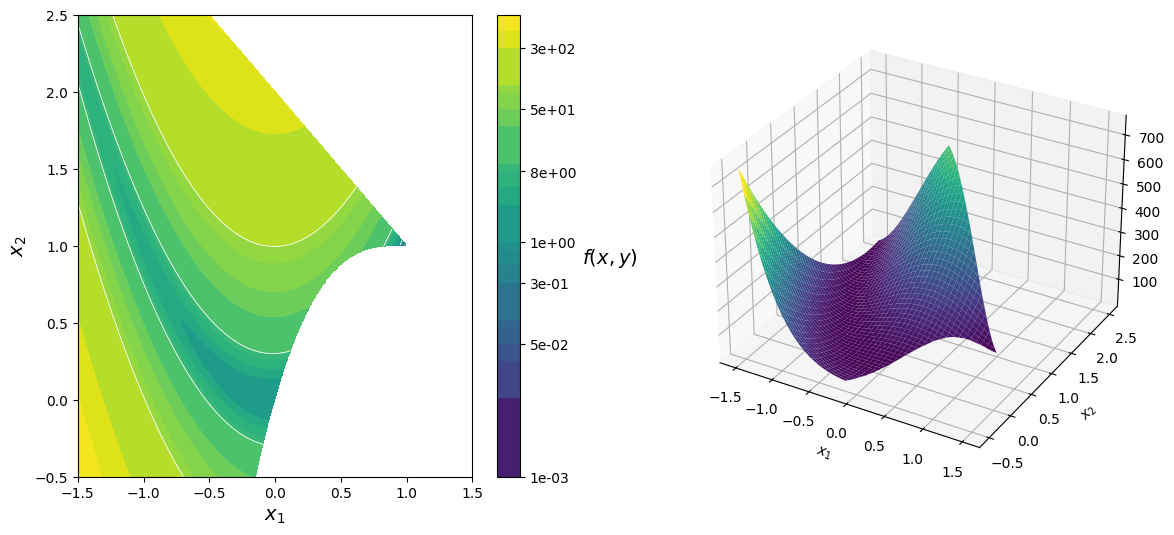

In [7]:
fig = plt.figure(figsize=(14, 6))

levels1 = [10 ** i for i in range(-3, 5)]

n = [1, 3, 5, 8]
levels2 = [0.001] + [0.01 * i for i in n] + [0.1 * i for i in n] + [1 * i for i in n] + [10 * i for i in n] + [100 * i for i in n] 

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, levels1=levels1, levels2=levels2, log=True)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1,  X2, Z, ax=ax)

## Pymoo Workflow

To perform a optimization task using **Pymoo** there are some steps needed:

* Define the optimization problem.
* Select the optimization algorithm
* Define a termination criterion
* Initialize the evolutionary process
* Visualize the results


### Defining the optimization problem

We use from `pymoo.core.problem` de class **ElementWiseProblem** to create the optimization problem:

In [8]:
from pymoo.core.problem import ElementwiseProblem

class RosenbrockProblem(ElementwiseProblem):

    def __init__(self):
        """ 
        xl: Defines the lower boundary for each variable (array)
        xu: Defines the upper boundary for each variable (array)
        numberVariables: The number of design variables (int)
        numberObjetives: The numbes of objectives functions (int)
        nIeqConstr: The number of inequality contraints (int)
        """

        xl = np.array([-1.5, -0.5])
        xu = np.array([1.5, 2.5])
        numberVariables = 2
        numberObjectives = 1
        nIeqConstr = 2

        super().__init__(n_var=numberVariables,
                         n_obj=numberObjectives,
                         n_ieq_constr=nIeqConstr,
                         xl=xl,
                         xu=xu)
        
    def _evaluate(self, x, out, *args, **kwargs):
        """
        This method compute the fitness and the constraints for each individual
        out['F']: Fitness
        out['G']: Constraints (if n_ieq_constr or n_eq_constr > 0)
        """
        out['F'] = rosenbrockFunction(x[0], x[1])        
        out['G'] = [g1(x[0], x[1]), g2(x[0], x[1])]

In [9]:
problem = RosenbrockProblem()

### Selecting the optimization algorithm

**Pymoo** includes many algorithm for single-objective optimization such as genetic algorithm (**GA**), differential evolution (**DE**), stochastic ranking evolutionary strategy (**SRES**), etc.

The class **GA** for single-objective optimization has as default the following genetic operators:

* **Selection** -> Tournament Selection
* **Crossover** -> Simulated Binary Crossover (SBX)
* **Mutation** -> Polynomial Mutation

In [10]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.mutation.pm import PolynomialMutation

# Define the number of individues
populationSize = 50

# Although polynomial mutation is the default in 'GA', we import the class
# for change 'eta' parameter
mutation = PolynomialMutation(prob=1, eta=1)

algorithm = GA(
    pop_size=populationSize,
    mutation=mutation,
    eliminate_duplicates=True
)

### Selecting the termination criterion

For this problem the termination criterion will be the number of generations:

In [11]:
from pymoo.termination import get_termination

numberGenerations = 500

termination = get_termination('n_gen', numberGenerations)

### Initializing the evolutionary process

To initialize the optimization process, the `minimize` function needs to be called with the following arguments:

* **problem** -> The problem to be optimizated (obj)
* **algorithm** -> The optimization algorithm (obj)
* **termination** -> The termination criterion (obj)
* **verbose** -> Determines whether information about the evolutionary process will be saved (bool)
* **save_history** -> If set to **True**, the history of the evolutionary process will be saved (bool)
* **seed** -> Used to ensure reproducibility (int)

In [12]:
from pymoo.optimize import minimize

results = minimize(
    problem,
    algorithm,
    termination,
    save_history=True,
    verbose=True,
    seed=16
)

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       50 |  0.000000E+00 |  0.3250807405 |  7.168200E+01 |  2.0130309757
     2 |      100 |  0.000000E+00 |  0.000000E+00 |  3.768857E+01 |  2.0130309757
     3 |      150 |  0.000000E+00 |  0.000000E+00 |  1.623095E+01 |  2.0130309757
     4 |      200 |  0.000000E+00 |  0.000000E+00 |  9.2470426172 |  2.0130309757
     5 |      250 |  0.000000E+00 |  0.000000E+00 |  6.4611751169 |  2.0130309757
     6 |      300 |  0.000000E+00 |  0.000000E+00 |  4.9141566356 |  1.3718037125
     7 |      350 |  0.000000E+00 |  0.000000E+00 |  3.6975785494 |  1.3718037125
     8 |      400 |  0.000000E+00 |  0.000000E+00 |  3.1933648221 |  1.0362123497
     9 |      450 |  0.000000E+00 |  0.000000E+00 |  2.6900726876 |  1.0362123497
    10 |      500 |  0.000000E+00 |  0.000000E+00 |  2.2241808276 |  1.0362123497
    11 |      550 |  0.000000E+00 |  0.000000E+00 |  1.9904755650 |  1.0362123497
    12 |      60

### Results

In [13]:
X, F = results.X, results.F
X_analytical = [1, 1]

print('Results: \n')
print(f'Population size: {populationSize}, Number of generations: {numberGenerations} \n')
print('Minimum:')
print(f'Analytical: {0.00}, GA: {F[0]:.6f}')
print('X')
print(f'Analytical: {X_analytical}')
print(f'GA: {X}')

Results: 

Population size: 50, Number of generations: 500 

Minimum:
Analytical: 0.0, GA: 0.000008
X
Analytical: [1, 1]
GA: [0.99989611 1.00007275]


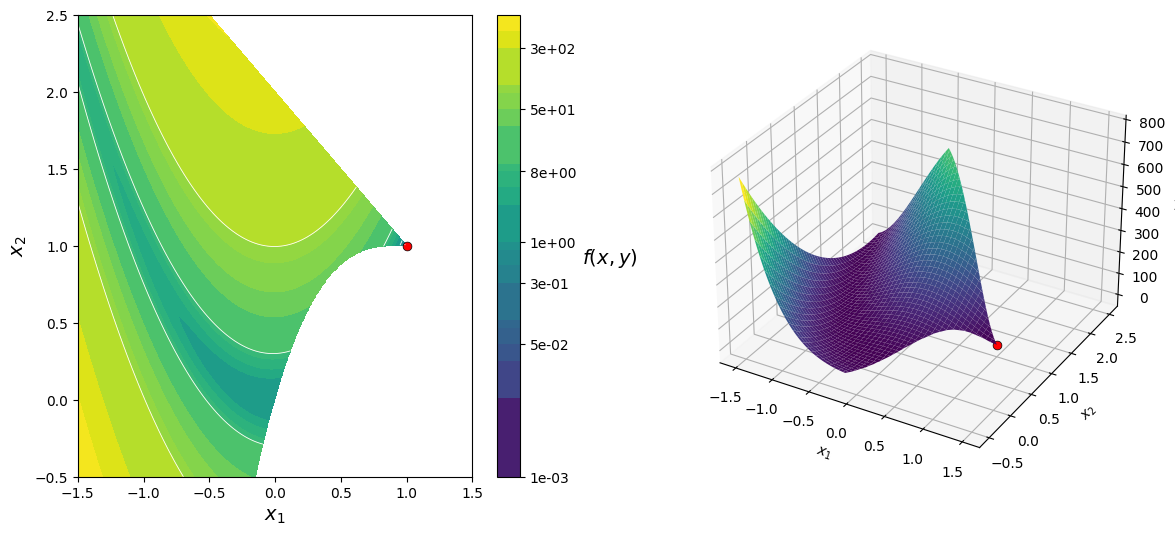

In [14]:
fig = plt.figure(figsize=(14, 6))

levels1 = [10 ** i for i in range(-3, 5)]

n = [1, 3, 5, 8]
levels2 = [0.001] + [0.01 * i for i in n] + [0.1 * i for i in n] + [1 * i for i in n] + [10 * i for i in n] + [100 * i for i in n] 

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, levels1=levels1, levels2=levels2, optimum=X, log=True)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1,  X2, Z, ax=ax, optimum = [X[0], X[1], F])

### Evolutionary Process

Another useful ways to visualize the genetic algorithm performance is by plotting the fitness of the best individual and the average population fitness in each generation. The `results.history` object has saved all information of the evolutionary process.

In [15]:
# Get the population in each generation
population = [GA.pop for GA in results.history]

# Save the fitness of the best individual
bestFitness = [np.min(pop.get('F')) for pop in population]

# Compute the average fitness for each generation
averageFitness = [np.average(pop.get('F')) for pop in population]

# Number of generations
generation = np.arange(1, len(population) + 1)

Text(0.5, 0.98, 'Evolutionary Process')

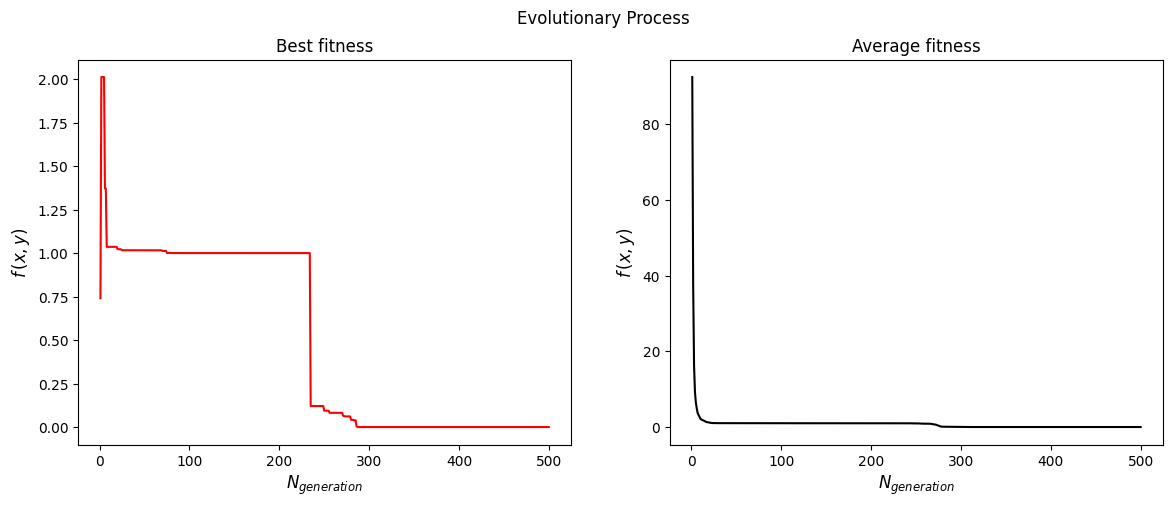

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(generation, bestFitness, color='red')
ax1.set_xlabel(r'$N_{generation}$', fontsize=12)
ax1.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax1.set_title('Best fitness')

ax2.plot(generation, averageFitness, color='black')
ax2.set_xlabel(r'$N_{generation}$', fontsize=12)
ax2.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax2.set_title('Average fitness')

plt.suptitle('Evolutionary Process')

## Mishra's Bird function constrained

The mishra's function is defined as:

$$
f(x_1, x_2) = \sin{(x_2)}e^{(1 - \cos{x_1})^2} + \cos{(x_1)}e^{(1 - \sin{x_2})^2} + (x_1 - x_2)^2
$$

subject to:

$$
g_1(x_1, x_2) = (x_1 + 5)^2 + (x_2 + 5)^2 -25 < 0
$$

The search domain for this function is:

$$
    \begin{align*}
    -10 \leq \, &x_1 \leq 0 \\
    -6.5 \leq \, &x_2 \leq 0
    \end{align*}
$$

The global minimum is:

$$
f(-3.1202468, -1.5821422) = -106.7645367
$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

First we need to define the function and the constraint:

In [18]:
def mishraFunction(x_1, x_2):

    A = (1 - np.cos(x_1))**2
    B = np.sin(x_2) * np.exp(A)

    C = (1 - np.sin(x_2))**2
    D = np.cos(x_1) * np.exp(C)

    E = (x_1 - x_2)**2

    return B + D + E

In [19]:
def g1(x_1, x_2):

    A = (x_1 + 5)**2
    B = (x_2 + 5)**2

    return A + B - 25

For visualization first we need some points:

In [20]:
# Create some points
x_1 = np.linspace(-10.5, 0.5, 500)
x_2 = np.linspace(-10.5, 0.5, 500)

X1, X2 = np.meshgrid(x_1, x_2)

# Compute f(X)
Z = mishraFunction(X1, X2)

Z[g1(X1, X2) >= 0] = np.nan

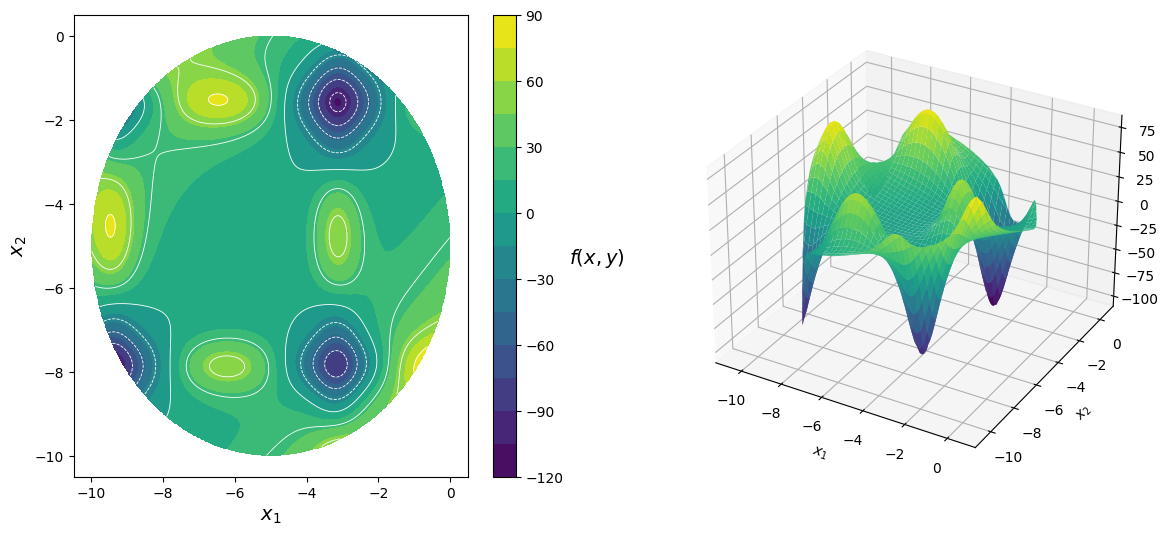

In [21]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, levels1=8, levels2=16)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1,  X2, Z, ax=ax)

### Defining the optimization problem

In [22]:
from pymoo.core.problem import ElementwiseProblem

class MishraProblem(ElementwiseProblem):

    def __init__(self):
        """ 
        xl: Defines the lower boundary for each variable (array)
        xu: Defines the upper boundary for each variable (array)
        numberVariables: The number of design variables (int)
        numberObjetives: The numbes of objectives functions (int)
        nIeqConstr: The number of inequality contraints (int)
        """

        xl = np.array([-10, -6.5])
        xu = np.array([0, 0])
        numberVariables = 2
        numberObjectives = 1
        nIeqConstr = 1

        super().__init__(n_var=numberVariables,
                         n_obj=numberObjectives,
                         n_ieq_constr=nIeqConstr,
                         xl=xl,
                         xu=xu)
        
    def _evaluate(self, x, out, *args, **kwargs):
        """
        This method compute the fitness and the constraints for each individual
        out['F']: Fitness
        out['G']: Constraints (if n_ieq_constr or n_eq_constr > 0)
        """
        out['F'] = mishraFunction(x[0], x[1])   
        out['G'] = g1(x[0], x[1])

In [23]:
problem = MishraProblem()

### Selecting the optimization algorithm

In [24]:
from pymoo.algorithms.soo.nonconvex.ga import GA

# Define the number of individues
populationSize = 20

algorithm = GA(
    pop_size=populationSize,
    eliminate_duplicates=True
)

### Selecting the termination criterion

In [25]:
from pymoo.termination import get_termination

numberGenerations = 30

termination = get_termination('n_gen', numberGenerations)

### Initializing the evolutionary process

In [26]:
from pymoo.optimize import minimize

results = minimize(
    problem,
    algorithm,
    termination,
    save_history=True,
    verbose=True,
    seed=16
)

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       20 |  0.000000E+00 |  1.4414800001 |  2.3675425848 | -7.800536E+01
     2 |       40 |  0.000000E+00 |  0.000000E+00 | -9.974760E+00 | -8.968343E+01
     3 |       60 |  0.000000E+00 |  0.000000E+00 | -2.398810E+01 | -8.968343E+01
     4 |       80 |  0.000000E+00 |  0.000000E+00 | -5.863686E+01 | -8.968343E+01
     5 |      100 |  0.000000E+00 |  0.000000E+00 | -7.895403E+01 | -1.066897E+02
     6 |      120 |  0.000000E+00 |  0.000000E+00 | -9.019357E+01 | -1.066905E+02
     7 |      140 |  0.000000E+00 |  0.000000E+00 | -9.944899E+01 | -1.066905E+02
     8 |      160 |  0.000000E+00 |  0.000000E+00 | -1.045795E+02 | -1.066905E+02
     9 |      180 |  0.000000E+00 |  0.000000E+00 | -1.054990E+02 | -1.066905E+02
    10 |      200 |  0.000000E+00 |  0.000000E+00 | -1.062409E+02 | -1.066939E+02
    11 |      220 |  0.000000E+00 |  0.000000E+00 | -1.063744E+02 | -1.066939E+02
    12 |      24

### Results

In [27]:
X, F = results.X, results.F
X_analytical = [-3.1302468, -1.5821422]

print('Results: \n')
print(f'Population size: {populationSize}, Number of generations: {numberGenerations} \n')
print('Minimum:')
print(f'Analytical: {-106.7645367}, GA: {F[0]:.6f}')
print('X')
print(f'Analytical: {X_analytical}')
print(f'GA: {X}')

Results: 

Population size: 20, Number of generations: 30 

Minimum:
Analytical: -106.7645367, GA: -106.748853
X
Analytical: [-3.1302468, -1.5821422]
GA: [-3.13884593 -1.58854458]


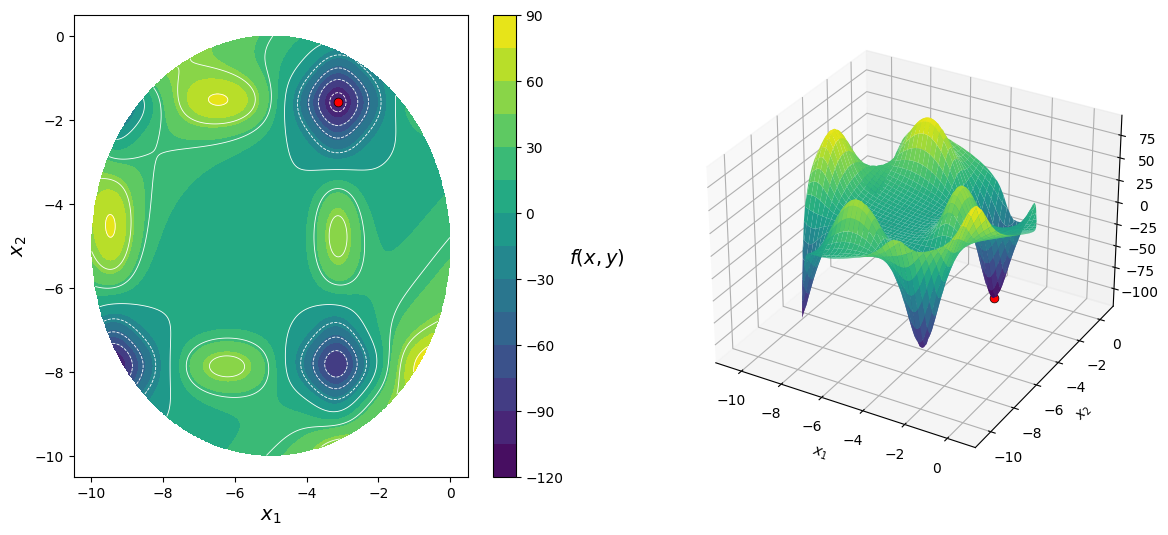

In [28]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, levels1=8, levels2=16, optimum=X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1,  X2, Z, ax=ax, optimum = [X[0], X[1], F])

### Evolutionary process

In [29]:
# Get the population in each generation
population = [GA.pop for GA in results.history]

# Save the fitness of the best individual
bestFitness = [np.min(pop.get('F')) for pop in population]

# Compute the average fitness for each generation
averageFitness = [np.average(pop.get('F')) for pop in population]

# Number of generations
generation = np.arange(1, len(population) + 1)

Text(0.5, 0.98, 'Evolutionary Process')

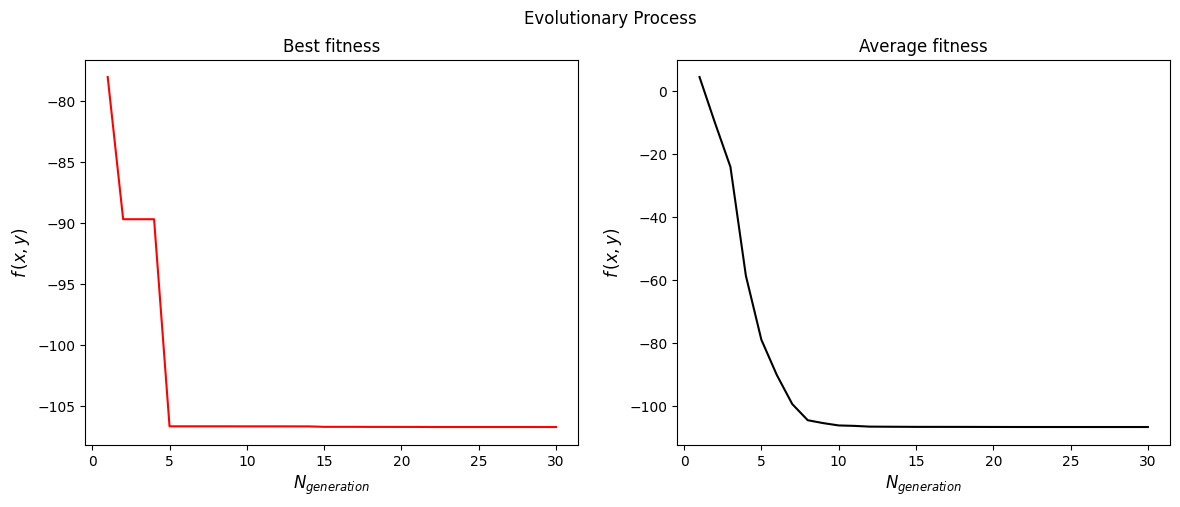

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(generation, bestFitness, color='red')
ax1.set_xlabel(r'$N_{generation}$', fontsize=12)
ax1.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax1.set_title('Best fitness')

ax2.plot(generation, averageFitness, color='black')
ax2.set_xlabel(r'$N_{generation}$', fontsize=12)
ax2.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax2.set_title('Average fitness')

plt.suptitle('Evolutionary Process')

## Gomez and Levy function (modified)

This function is defined as:

$$
    f(x_1, x_2) = 4x_1^2 -2.1x_1^4 + \frac{1}{3}x_1^6 + x_1x_2 - 4x_2^2 + 4x_2^4
$$

subjected to:

$$
    g_1(x_1, x_2) = -\sin{4\pi x_1} + 2 \sin^2{(2\pi x_2)} -1.5 \leq 0
$$

The search domain for this function is:

$$
    \begin{align*}
    -1 \leq \, &x_1 \leq 0.75 \\
    -1 \leq \, &x_2 \leq 1
    \end{align*}
$$

The global minimum is:

$$
f(0.08984201, -0.7126564) = -1.031628453
$$

Let's define the function and the constraint

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def levyFunction(x_1, x_2):

    A = 4 * x_1**2 - 2.1 * x_1**4 + (1/3) * x_1**6
    B = x_1 * x_2
    C = -4 * x_2**2 + 4 * x_2**4

    return A + B + C

In [33]:
def g1(x_1, x_2):

        A = -np.sin(4 * np.pi * x_1)
        B = 2*np.sin(2 * np.pi * x_2)**2

        return A + B - 1.5

To get a better visualization of the function, let's generate some points for plotting:

In [34]:
# Create some points
x_1 = np.linspace(-1, 0.75, 500)
x_2 = np.linspace(-1, 1, 500)

X1, X2 = np.meshgrid(x_1, x_2)

# Compute f(X)
Z = levyFunction(X1, X2)

Z[g1(X1, X2) > 0] = np.nan

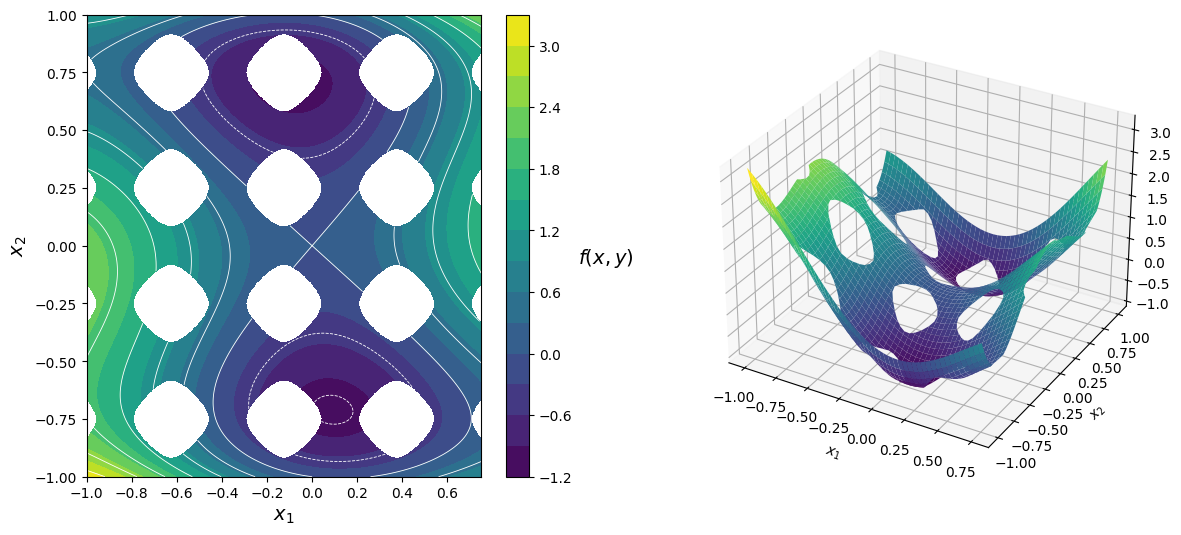

In [35]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, levels1=8, levels2=16)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1,  X2, Z, ax=ax)

### Defining the optimization problem

In [36]:
from pymoo.core.problem import ElementwiseProblem

class LevyProblem(ElementwiseProblem):
    
    def __init__(self):
        """ 
        xl: Defines the lower boundary for each variable (float)
        xu: Defines the upper boundary for each variable (array)
        numberVariables: The number of design variables (int)
        numberObjetives: The numbes of objectives functions (int)
        nIeqConstr: The number of inequality contraints (int)
        """

        xl = -1.0 # Here we use an float dtype because is the same lower boundary for each variable
        xu = np.array([0.75, 1])
        numberVariables = 2
        numberObjectives = 1
        nIeqConstr = 1

        super().__init__(n_var=numberVariables,
                         n_obj=numberObjectives,
                         n_ieq_constr=nIeqConstr,
                         xl=xl,
                         xu=xu)
        
    def _evaluate(self, x, out, *args, **kwargs):
        """
        This method compute the fitness and the constraints for each individual
        out['F']: Fitness
        out['G']: Constraints (if n_ieq_constr or n_eq_constr > 0)
        """
        out['F'] = levyFunction(x[0], x[1])        
        out['G'] = g1(x[0], x[1])

In [37]:
problem = LevyProblem()

### Selecting the optimization algorithm

As mentioned earlier, the default genetic operators are Tournament Selection, Simulated Binary Crossover (SBX), Polynomial Mutation. However, if needed, we can select a different operator.

In [38]:
# Import random selection
from pymoo.operators.selection.rnd import RandomSelection
# Import uniform crossover
from pymoo.operators.crossover.ux import UniformCrossover
# Import the algorithm
from pymoo.algorithms.soo.nonconvex.ga import GA

# Random selection operator
selection = RandomSelection()
# Uniform crossover operator
crossover = UniformCrossover()
# Define the number of individues
populationSize = 20

algorithm = GA(
    pop_size=populationSize,
    selection=selection,
    crossover=crossover,
    eliminate_duplicates=True
)

### Selecting the termination criterion

The termination criterion can accept additional parameters beyonf just the number of generations. In fact, **Pymoo** has already implemented an intuitive way to customize it.

We can have more control of the termination criterion using `DefaulSingleObjectiveTermination`.

The `DefaulSingleOvbjectiveTermination` takes the following parameters:

* **xtol** -> Track the change in the design space, if the value is below this bound, the optimization process stops.
* **ftol** -> Use the objective space to decide whether to terminate the algorithm.
* **cvtol** -> As **xtol** and **ftol** use the constraint space as termination criterion
* **period**
* **n_max_gen** -> Maximum number of generations
* **n_max_evals** -> Maximum number of evaluations

In [39]:
from pymoo.termination.default import DefaultSingleObjectiveTermination

termination = DefaultSingleObjectiveTermination(
    xtol=1e-3,
    cvtol= 1e-3,
    ftol=1e-3,
    period=20,
    n_max_gen=100,
    n_max_evals=2000
)

### Initializing the evolutionary process

In [40]:
from pymoo.optimize import minimize

results = minimize(
    problem,
    algorithm,
    termination,
    save_history=True,
    verbose=True,
    seed=16
)

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       20 |  0.000000E+00 |  0.0333177682 |  0.3334189866 | -9.641126E-01
     2 |       40 |  0.000000E+00 |  0.000000E+00 | -7.754392E-02 | -9.641126E-01
     3 |       60 |  0.000000E+00 |  0.000000E+00 | -3.740239E-01 | -9.967320E-01
     4 |       80 |  0.000000E+00 |  0.000000E+00 | -6.182045E-01 | -9.967320E-01
     5 |      100 |  0.000000E+00 |  0.000000E+00 | -7.711261E-01 | -1.016186E+00
     6 |      120 |  0.000000E+00 |  0.000000E+00 | -8.594438E-01 | -1.016186E+00
     7 |      140 |  0.000000E+00 |  0.000000E+00 | -9.077022E-01 | -1.016186E+00
     8 |      160 |  0.000000E+00 |  0.000000E+00 | -9.414540E-01 | -1.016186E+00
     9 |      180 |  0.000000E+00 |  0.000000E+00 | -9.780352E-01 | -1.029329E+00
    10 |      200 |  0.000000E+00 |  0.000000E+00 | -9.986193E-01 | -1.029329E+00
    11 |      220 |  0.000000E+00 |  0.000000E+00 | -1.014307E+00 | -1.029329E+00
    12 |      24

### Results

In [41]:
X, F = results.X, results.F
X_analytical = [0.08984201, -0.7126564]

print('Results: \n')
print(f'Population size: {populationSize}, Number of generations: {numberGenerations} \n')
print('Minimum:')
print(f'Analytical: {-1.031628453}, GA: {F[0]:.6f}')
print('X')
print(f'Analytical: {X_analytical}')
print(f'GA: {X}')

Results: 

Population size: 20, Number of generations: 30 

Minimum:
Analytical: -1.031628453, GA: -1.031625
X
Analytical: [0.08984201, -0.7126564]
GA: [ 0.08895743 -0.71265431]


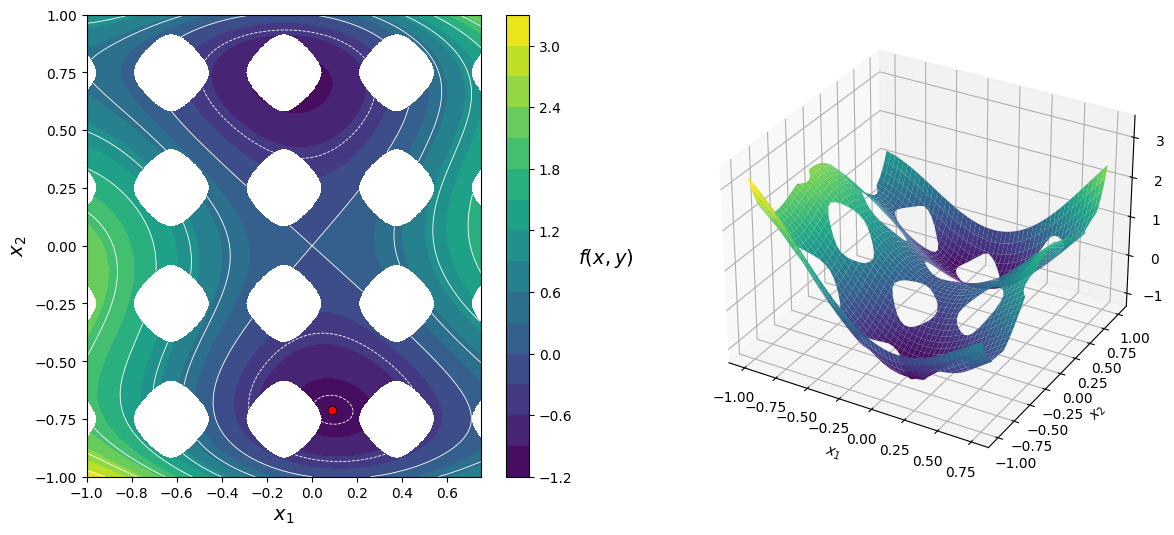

In [42]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, levels1=8, levels2=16, optimum=X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1,  X2, Z, ax=ax, optimum=[X[0], X[1], F])

### Evolutionary process

In [43]:
# Get the population in each generation
population = [GA.pop for GA in results.history]

# Save the fitness of the best individual
bestFitness = [np.min(pop.get('F')) for pop in population]

# Compute the average fitness for each generation
averageFitness = [np.average(pop.get('F')) for pop in population]

# Number of generations
generation = np.arange(1, len(population) + 1)

Text(0.5, 0.98, 'Evolutionary Process')

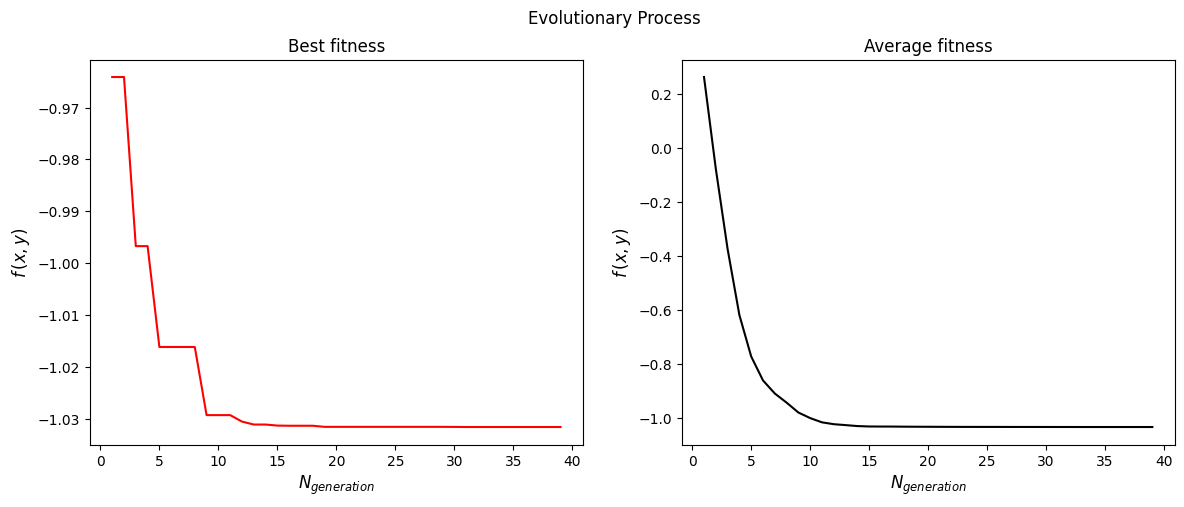

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(generation, bestFitness, color='red')
ax1.set_xlabel(r'$N_{generation}$', fontsize=12)
ax1.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax1.set_title('Best fitness')

ax2.plot(generation, averageFitness, color='black')
ax2.set_xlabel(r'$N_{generation}$', fontsize=12)
ax2.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax2.set_title('Average fitness')

plt.suptitle('Evolutionary Process')